<a href="https://colab.research.google.com/github/roberth2018/Trabajos-de-Machine-Learning/blob/main/trabajo_machine_learning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TRABAJO DE MACHINE LEARNING **

**1.	Unsupervised Learning con K-Means**

In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv 

In [2]:
# Importando la dataset
data_covid=read_csv('Data_cov.csv',sep=';' , encoding='latin-1',header=0)
#Detalles de la data
print(data_covid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sector                1998 non-null   object 
 1   Dep                   1998 non-null   object 
 2   Impactado             1998 non-null   int64  
 3   Saldo                 1998 non-null   float64
 4   Desembolso_mes        1998 non-null   float64
 5   Saldo Promedio        1998 non-null   float64
 6   Deuda Sistea,         1998 non-null   float64
 7   Pasivo                1998 non-null   float64
 8   Turismo               1998 non-null   int64  
 9   Sector de Impacto     1998 non-null   int64  
 10  Venta                 1998 non-null   float64
 11  Venta Formal          1998 non-null   float64
 12  Pasivo_desembolso     1998 non-null   float64
 13  Deuda rezagada va     1998 non-null   float64
 14  Deuda rezagada vr     1998 non-null   float64
 15  pasivo rezagada va   

In [3]:
#Missing values
# Eliminando valores nulos 
print(data_covid.isnull().sum())

Sector                  0
Dep                     0
Impactado               0
Saldo                   0
Desembolso_mes          0
Saldo Promedio          0
Deuda Sistea,           0
Pasivo                  0
Turismo                 0
Sector de Impacto       0
Venta                   0
Venta Formal            0
Pasivo_desembolso       0
Deuda rezagada va       0
Deuda rezagada vr       0
pasivo rezagada va      0
pasivo rezagada vr      0
Pasivo_desembolso da    0
Pasivo_desembolso dr    0
dtype: int64


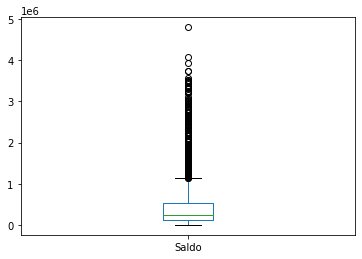

In [4]:
#Eliminando OUTLIERS
#Saldo
data_covid.Saldo.plot.box()

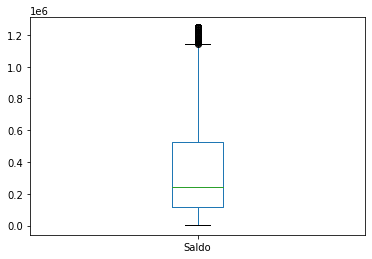

In [5]:
#Saldo después de eliminar outliers
cotas_Saldo=np.percentile(data_covid[-data_covid.Saldo.isnull()]['Saldo'],[1,90])
cotas_Saldo
data_covid.loc[data_covid.Saldo>=cotas_Saldo[1],'Saldo']=cotas_Saldo[1]
data_covid.loc[data_covid.Saldo<=cotas_Saldo[0],'Saldo']=cotas_Saldo[0]
[np.min(data_covid.Saldo),np.max(data_covid.Saldo)]
data_covid.Saldo.plot.box()

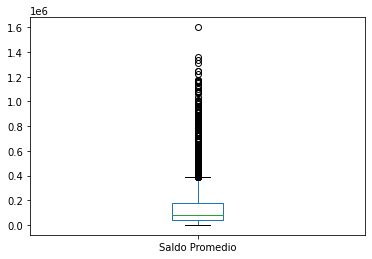

In [6]:
#Saldo promedio
data_covid["Saldo Promedio"].plot.box()

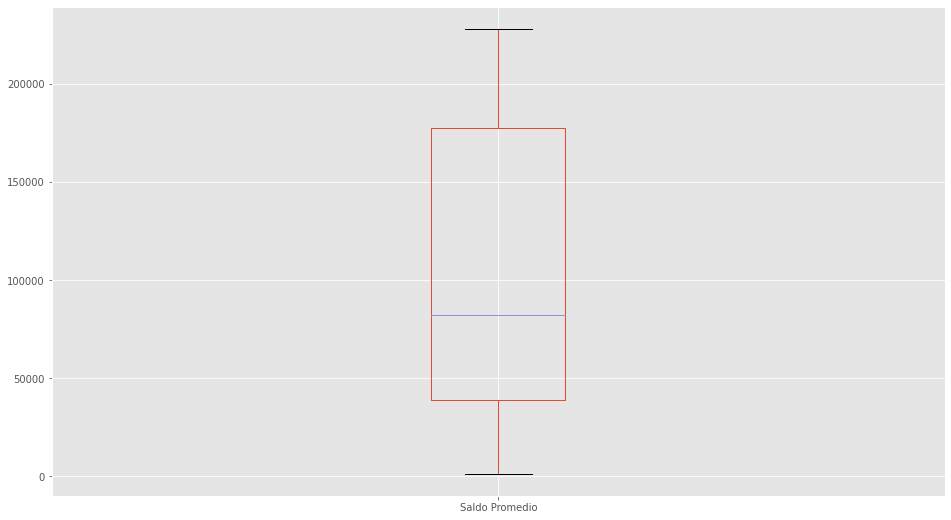

In [253]:
#saldo promedio después
cotas_Saldo_promedio=np.percentile(data_covid[-data_covid["Saldo Promedio"].isnull()]['Saldo Promedio'],[1,80])
cotas_Saldo_promedio
data_covid.loc[data_covid["Saldo Promedio"]>=cotas_Saldo_promedio[1],'Saldo Promedio']=cotas_Saldo_promedio[1]
data_covid.loc[data_covid["Saldo Promedio"]<=cotas_Saldo_promedio[0],'Saldo Promedio']=cotas_Saldo_promedio[0]
data_covid["Saldo Promedio"].plot.box()

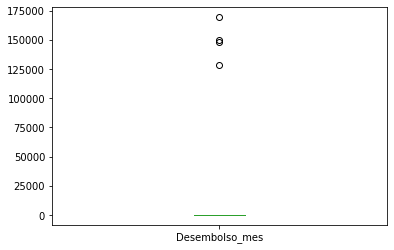

In [8]:
#Desembolso mes
data_covid["Desembolso_mes"].plot.box()

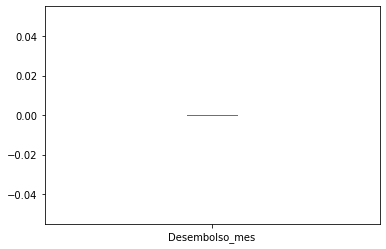

In [9]:
#Desembolso después
cotas_Desembolso_mes=np.percentile(data_covid[-data_covid["Desembolso_mes"].isnull()]['Desembolso_mes'],[1,90])
cotas_Desembolso_mes
data_covid.loc[data_covid["Desembolso_mes"]>=cotas_Desembolso_mes[1],'Desembolso_mes']=cotas_Desembolso_mes[1]
data_covid.loc[data_covid["Desembolso_mes"]<=cotas_Desembolso_mes[0],'Desembolso_mes']=cotas_Desembolso_mes[0]
data_covid["Desembolso_mes"].plot.box()

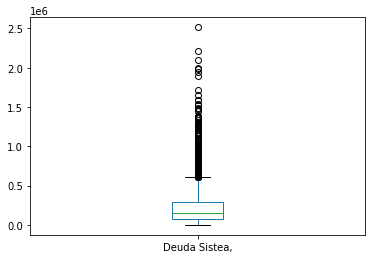

In [10]:
#Deuda Sistema
data_covid["Deuda Sistea,"].plot.box()

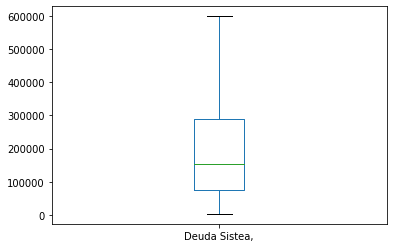

In [11]:
#Deuda sin ouliers
cotas_Deuda_sistema=np.percentile(data_covid[-data_covid["Deuda Sistea,"].isnull()]['Deuda Sistea,'],[1,90])
cotas_Deuda_sistema
data_covid.loc[data_covid["Deuda Sistea,"]>=cotas_Deuda_sistema[1],'Deuda Sistea,']=cotas_Deuda_sistema[1]
data_covid.loc[data_covid["Deuda Sistea,"]<=cotas_Deuda_sistema[0],'Deuda Sistea,']=cotas_Deuda_sistema[0]
data_covid["Deuda Sistea,"].plot.box()

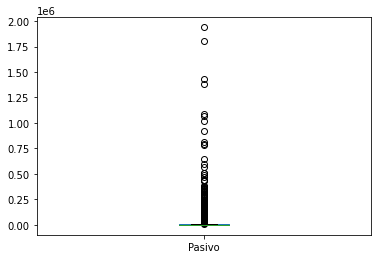

In [12]:
#Pasivos 
data_covid["Pasivo"].plot.box()

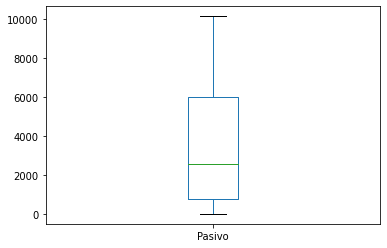

In [13]:
#Pasivos sin outliers
cotas_Pasivo=np.percentile(data_covid[-data_covid["Pasivo"].isnull()]['Pasivo'],[1,80])
cotas_Pasivo
data_covid.loc[data_covid["Pasivo"]>=cotas_Pasivo[1],'Pasivo']=cotas_Pasivo[1]
data_covid.loc[data_covid["Pasivo"]<=cotas_Pasivo[0],'Pasivo']=cotas_Pasivo[0]
data_covid["Pasivo"].plot.box()

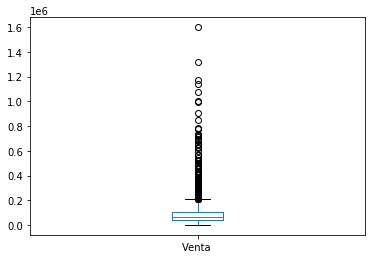

In [14]:
#Venta
data_covid["Venta "].plot.box()

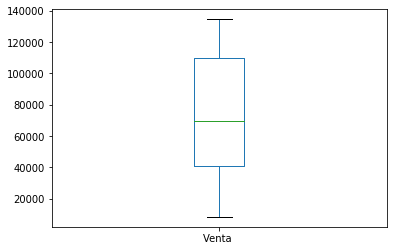

In [15]:
#Ventas sin outliers
cotas_Venta=np.percentile(data_covid[-data_covid["Venta "].isnull()]['Venta '],[1,80])
cotas_Venta
data_covid.loc[data_covid["Venta "]>=cotas_Venta[1],'Venta ']=cotas_Venta[1]
data_covid.loc[data_covid["Venta "]<=cotas_Venta[0],'Venta ']=cotas_Venta[0]
data_covid["Venta "].plot.box()

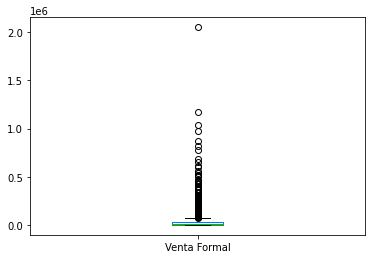

In [16]:
# Venta formal
data_covid["Venta Formal"].plot.box()

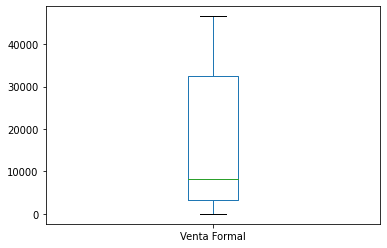

In [17]:
#Ventas formales sin outliers
cotas_Vformal=np.percentile(data_covid[-data_covid["Venta Formal"].isnull()]['Venta Formal'],[1,80])
cotas_Vformal
data_covid.loc[data_covid["Venta Formal"]>=cotas_Vformal[1],'Venta Formal']=cotas_Vformal[1]
data_covid.loc[data_covid["Venta Formal"]<=cotas_Vformal[0],'Venta Formal']=cotas_Vformal[0]
data_covid["Venta Formal"].plot.box()

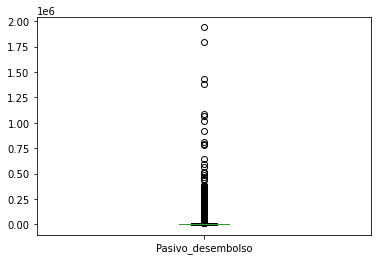

In [18]:
# Pasivo_desembolso 
data_covid["Pasivo_desembolso"].plot.box()

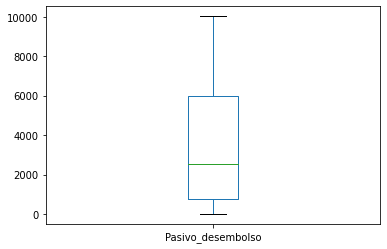

In [19]:
#Pasivos_desembolso sin outliers
cotas_Pasivo_desembolso=np.percentile(data_covid[-data_covid["Pasivo_desembolso"].isnull()]['Pasivo_desembolso'],[1,80])
cotas_Pasivo_desembolso 
data_covid.loc[data_covid["Pasivo_desembolso"]>=cotas_Pasivo_desembolso[1],'Pasivo_desembolso']=cotas_Pasivo_desembolso[1]
data_covid.loc[data_covid["Pasivo_desembolso"]<=cotas_Pasivo_desembolso[0],'Pasivo_desembolso']=cotas_Pasivo_desembolso[0]
data_covid["Pasivo_desembolso"].plot.box()

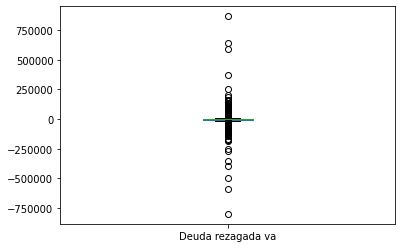

In [20]:
#Deuda rezagada va
data_covid["Deuda rezagada va"].plot.box()

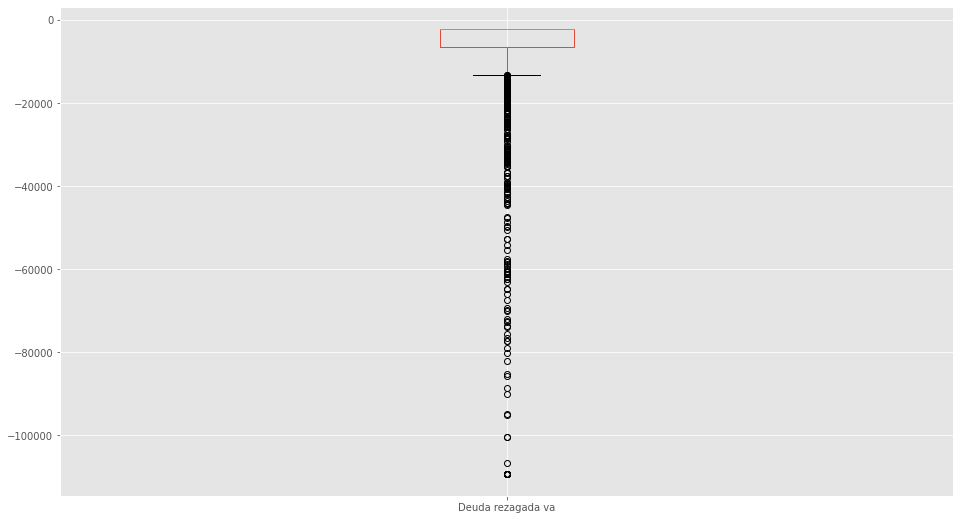

In [255]:
#Deuda rezagada va sin outliers
cotas_Drezagada_va=np.percentile(data_covid[-data_covid["Deuda rezagada va"].isnull()]['Deuda rezagada va'],[1,50])
cotas_Drezagada_va 
data_covid.loc[data_covid["Deuda rezagada va"]>=cotas_Drezagada_va[1],'Deuda rezagada va']=cotas_Drezagada_va[1]
data_covid.loc[data_covid["Deuda rezagada va"]<=cotas_Drezagada_va[0],'Deuda rezagada va']=cotas_Drezagada_va[0]
data_covid["Deuda rezagada va"].plot.box()

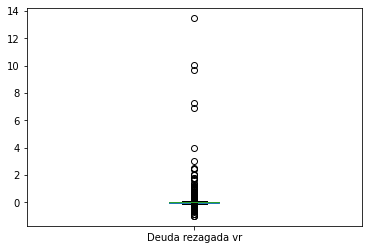

In [22]:
#Deuda rezagada vr
data_covid["Deuda rezagada vr"].plot.box()

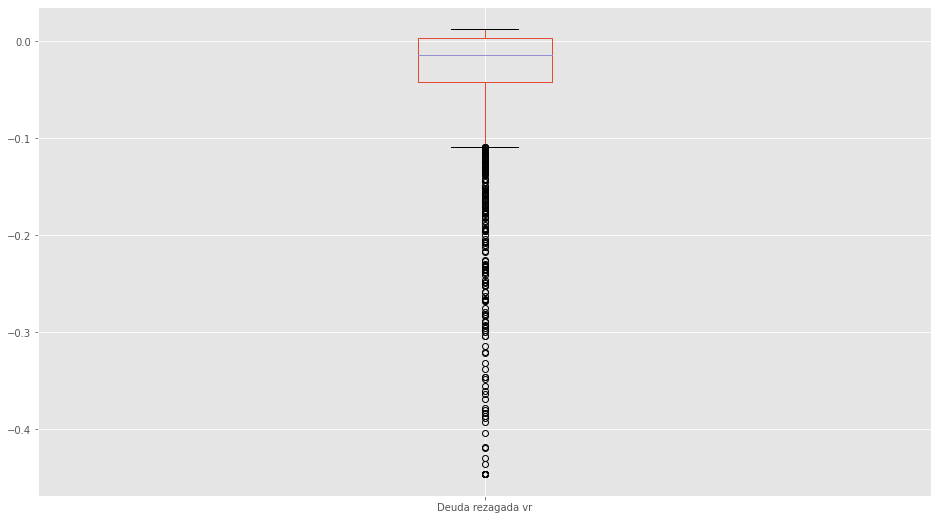

In [256]:
#Deuda rezagada var sin outliers
cotas_Drezagada_vr=np.percentile(data_covid[-data_covid["Deuda rezagada vr"].isnull()]['Deuda rezagada vr'],[1,80])
cotas_Drezagada_vr 
data_covid.loc[data_covid["Deuda rezagada vr"]>=cotas_Drezagada_vr[1],'Deuda rezagada vr']=cotas_Drezagada_vr[1]
data_covid.loc[data_covid["Deuda rezagada vr"]<=cotas_Drezagada_vr[0],'Deuda rezagada vr']=cotas_Drezagada_vr[0]
data_covid["Deuda rezagada vr"].plot.box()

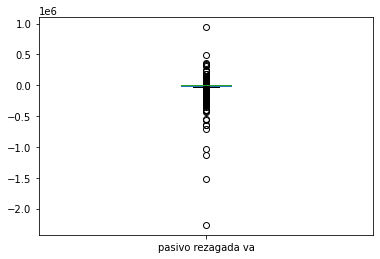

In [24]:
#pasivo rezagada va
data_covid["pasivo rezagada va"].plot.box()

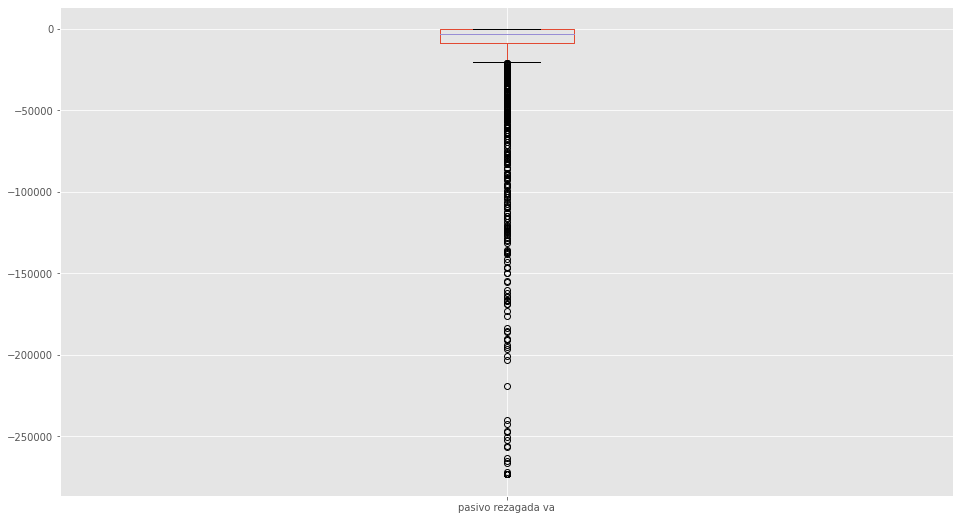

In [257]:
#Pasivo rezagada va sin outlieres
cotas_prezagada_va=np.percentile(data_covid[-data_covid["pasivo rezagada va"].isnull()]['pasivo rezagada va'],[1,80])
cotas_prezagada_va 
data_covid.loc[data_covid["pasivo rezagada va"]>=cotas_prezagada_va[1],'pasivo rezagada va']=cotas_prezagada_va[1]
data_covid.loc[data_covid["pasivo rezagada va"]<=cotas_prezagada_va[0],'pasivo rezagada va']=cotas_prezagada_va[0]
data_covid["pasivo rezagada va"].plot.box()

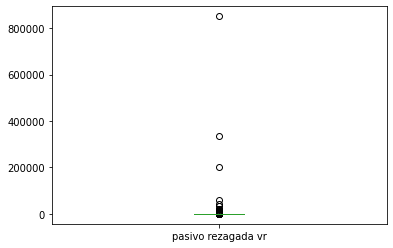

In [26]:
#pasivo rezagada vr
data_covid["pasivo rezagada vr"].plot.box()

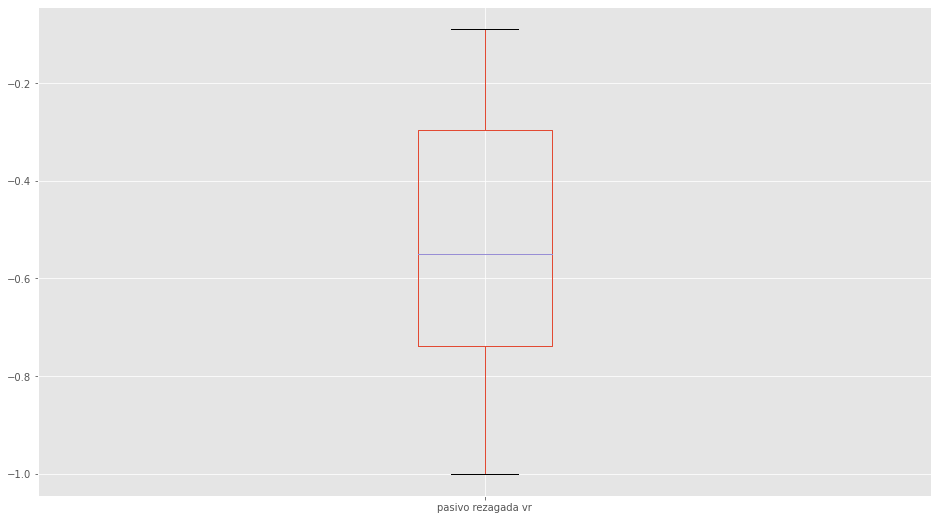

In [259]:
#pasivo rezagada vr sin outliers
cotas_prezagada_vr=np.percentile(data_covid[-data_covid["pasivo rezagada vr"].isnull()]['pasivo rezagada vr'],[1,80])
cotas_prezagada_va 
data_covid.loc[data_covid["pasivo rezagada vr"]>=cotas_prezagada_vr[1],'pasivo rezagada vr']=cotas_prezagada_vr[1]
data_covid.loc[data_covid["pasivo rezagada vr"]<=cotas_prezagada_vr[0],'pasivo rezagada vr']=cotas_prezagada_vr[0]
data_covid["pasivo rezagada vr"].plot.box()

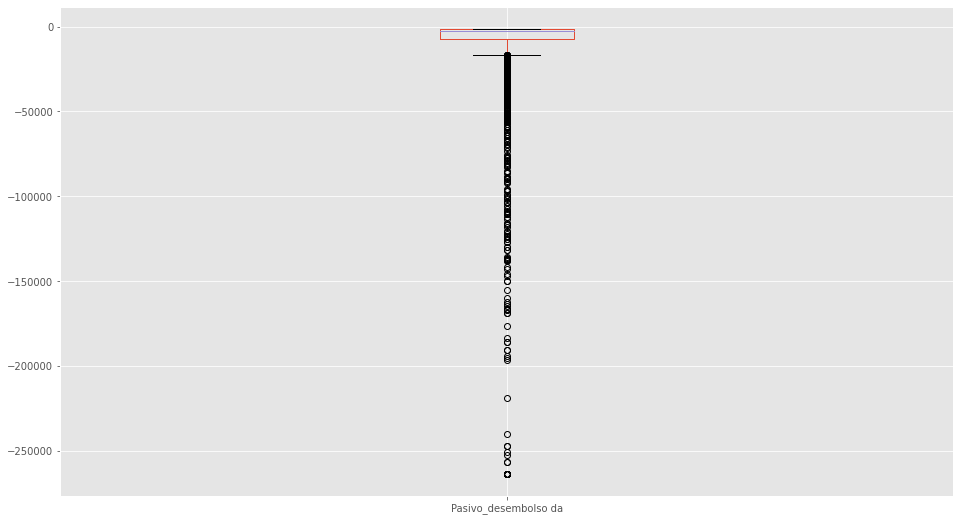

In [260]:
#Pasivo_desembolso da
data_covid["Pasivo_desembolso da"].plot.box()

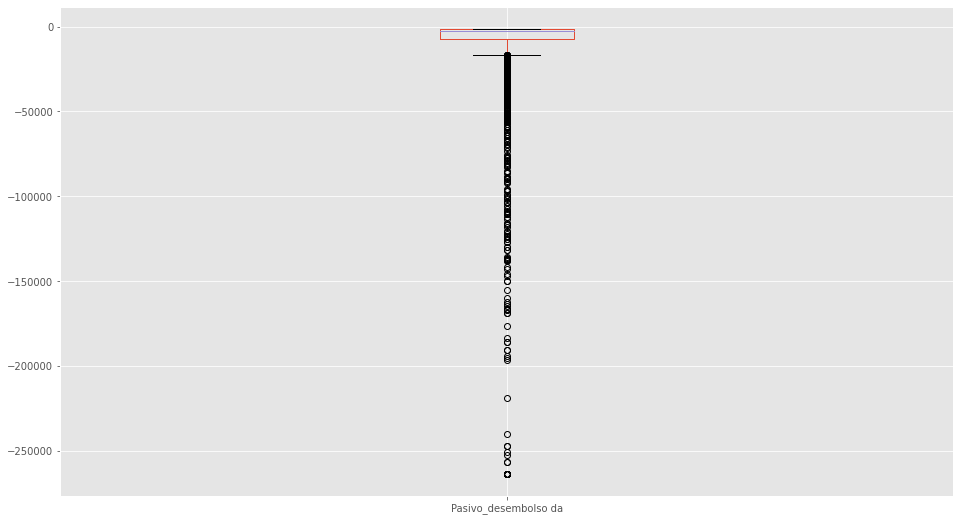

In [252]:
#Pasivo_desembolso da sin outliers
cotas_pdesembolso_da=np.percentile(data_covid[-data_covid["Pasivo_desembolso da"].isnull()]['Pasivo_desembolso da'],[1,75])
cotas_pdesembolso_da 
data_covid.loc[data_covid["Pasivo_desembolso da"]>=cotas_pdesembolso_da[1],'Pasivo_desembolso da']=cotas_pdesembolso_da[1]
data_covid.loc[data_covid["Pasivo_desembolso da"]<=cotas_pdesembolso_da[0],'Pasivo_desembolso da']=cotas_pdesembolso_da[0]
data_covid["Pasivo_desembolso da"].plot.box()

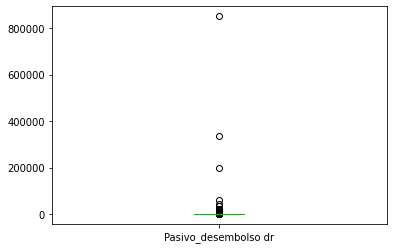

In [30]:
#Pasivo_desembolso dr
data_covid["Pasivo_desembolso dr"].plot.box()

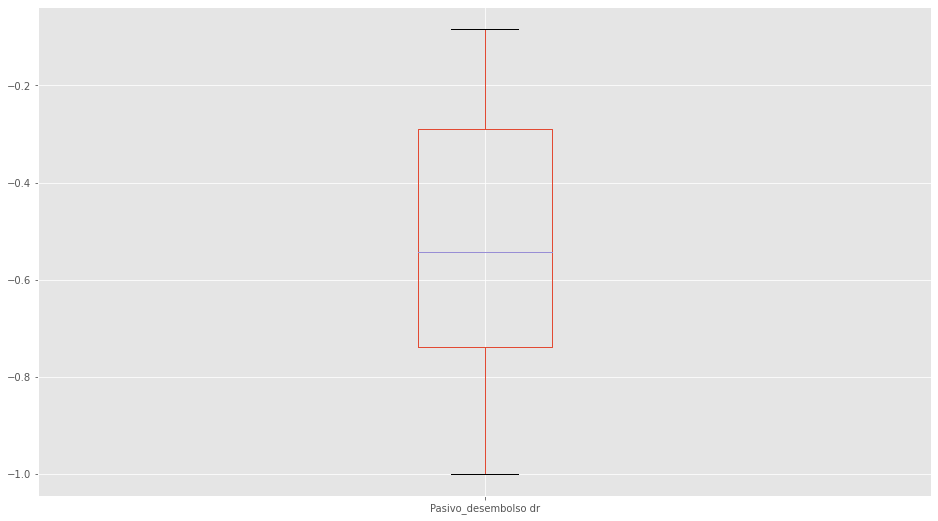

In [110]:
#Pasivo_desembolso dr sin outliers
cotas_pdesembolso_dr=np.percentile(data_covid[-data_covid["Pasivo_desembolso dr"].isnull()]['Pasivo_desembolso dr'],[1,80])
cotas_pdesembolso_dr 
data_covid.loc[data_covid["Pasivo_desembolso dr"]>=cotas_pdesembolso_dr[1],'Pasivo_desembolso dr']=cotas_pdesembolso_dr[1]
data_covid.loc[data_covid["Pasivo_desembolso dr"]<=cotas_pdesembolso_dr[0],'Pasivo_desembolso dr']=cotas_pdesembolso_dr[0]
data_covid["Pasivo_desembolso dr"].plot.box()

In [261]:
data_covid.columns
data_covid

Sector         Dep  ...  Pasivo_desembolso da  Pasivo_desembolso dr
0     INDUSTRIA        Lima  ...             -1384.655             -0.083333
1      COMERCIO    Arequipa  ...             -7043.430             -0.611896
2      SERVICIO    Amazonas  ...             -1384.655             -0.083333
3     INDUSTRIA        Lima  ...            -17128.300             -0.981351
4      COMERCIO       Cusco  ...             -2071.800             -1.000000
...         ...         ...  ...                   ...                   ...
1993   COMERCIO  Lambayeque  ...             -2548.500             -0.543144
1994   COMERCIO    Arequipa  ...            -10965.030             -0.783524
1995   COMERCIO        Lima  ...            -11589.600             -0.951247
1996   COMERCIO        Lima  ...            -18929.550             -0.780851
1997   SERVICIO    Arequipa  ...             -2548.500             -0.543144

[1998 rows x 19 columns]

In [262]:
#Separando variables features:
columnas=['Saldo','Saldo Promedio', 'Deuda Sistea,', 'Pasivo','Venta ', 'Venta Formal', 'Pasivo_desembolso',
       'Deuda rezagada va', 'Deuda rezagada vr', 'pasivo rezagada va',
       'pasivo rezagada vr', 'Pasivo_desembolso da', 'Pasivo_desembolso dr']
features=data_covid[columnas]
features.columns
features

Saldo  Saldo Promedio  ...  Pasivo_desembolso da  Pasivo_desembolso dr
0      56643.10092    28321.550460  ...             -1384.655             -0.083333
1     190313.99460    63437.998180  ...             -7043.430             -0.611896
2     547601.57360   182533.857900  ...             -1384.655             -0.083333
3     283914.20840    94638.069470  ...            -17128.300             -0.981351
4     142296.43840    47432.146120  ...             -2071.800             -1.000000
...            ...             ...  ...                   ...                   ...
1993    4325.85076     1441.950253  ...             -2548.500             -0.543144
1994   94650.62631    31550.208770  ...            -10965.030             -0.783524
1995  747579.33510   227849.374980  ...            -11589.600             -0.951247
1996   18077.98187     6025.993957  ...            -18929.550             -0.780851
1997  286471.03470    97561.751050  ...             -2548.500             -0.543144

[1998 rows x 13 columns]

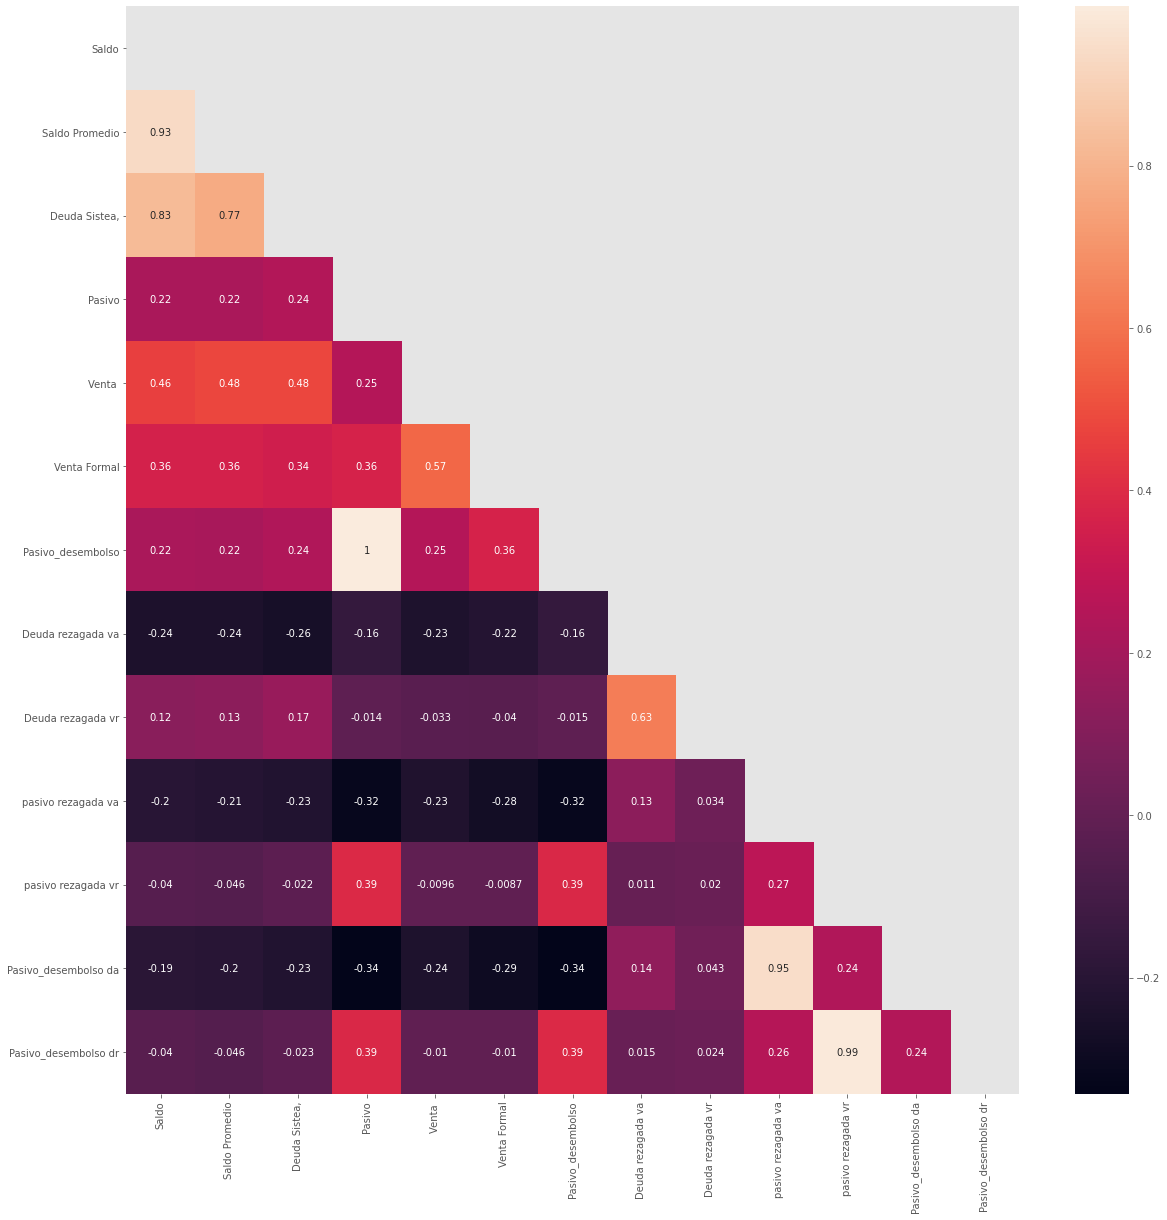

In [263]:
#hallando matriz de correlación de pearson para determinar la colinealidad entre features
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,20)) 
mask = np.zeros_like(features.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(features.corr(), mask= mask, ax= ax, annot= True)


In [114]:
#De la matriz de correlación de pearson se deduce que las variables: "Pasivo_desembolso dr" y "Pasivo rezagado vr" presentan
#alto coef de corr= 0.98 , así como "Pasivo_desembolso da" y "pasivo rezagada va" presentan coef de corr=0.98, 0.95
#mientras "saldo" con deuda del sistema y saldo promedio presentan coef de corr= 0.83
#Por lo tanto de las variables mencionadas se eliminarán 'Pasivo_desembolso','Pasivo_desembolso dr','pasivo rezagada va','Deuda Sistea,',
#y 'Saldo Promedio'
features.columns

Index(['Saldo', 'Saldo Promedio', 'Deuda Sistea,', 'Pasivo', 'Venta ',
       'Venta Formal', 'Pasivo_desembolso', 'Deuda rezagada va',
       'Deuda rezagada vr', 'pasivo rezagada va', 'pasivo rezagada vr',
       'Pasivo_desembolso da', 'Pasivo_desembolso dr'],
      dtype='object')

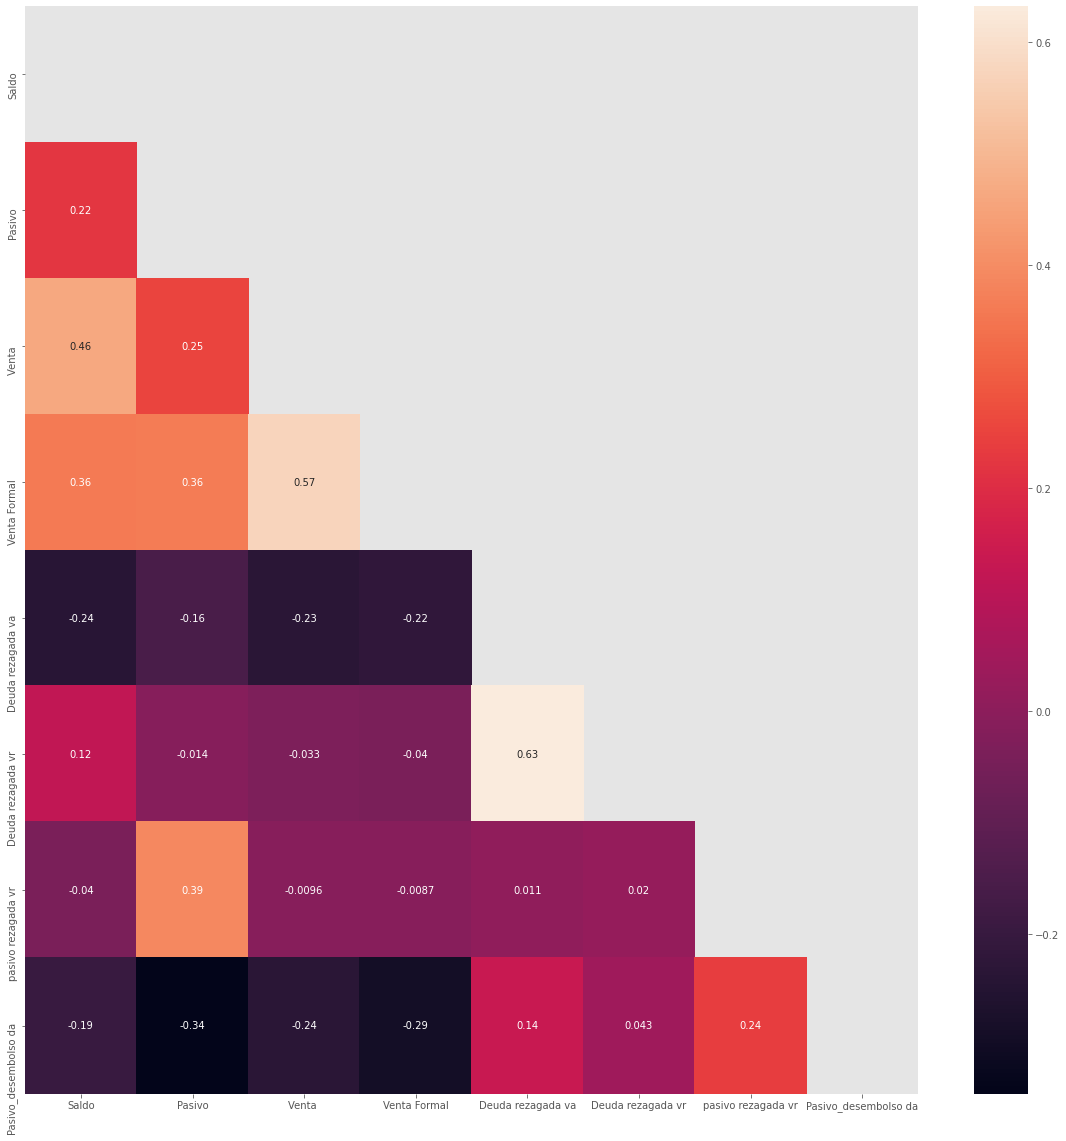

In [264]:
features2=features.drop(['Pasivo_desembolso','Pasivo_desembolso dr','pasivo rezagada va','Deuda Sistea,',
'Saldo Promedio'], axis=1)
features2.columns
#matriz de correlaticon con features2
fig, ax = plt.subplots(figsize=(20,20)) 
mask = np.zeros_like(features2.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(features2.corr(), mask= mask, ax= ax, annot= True)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


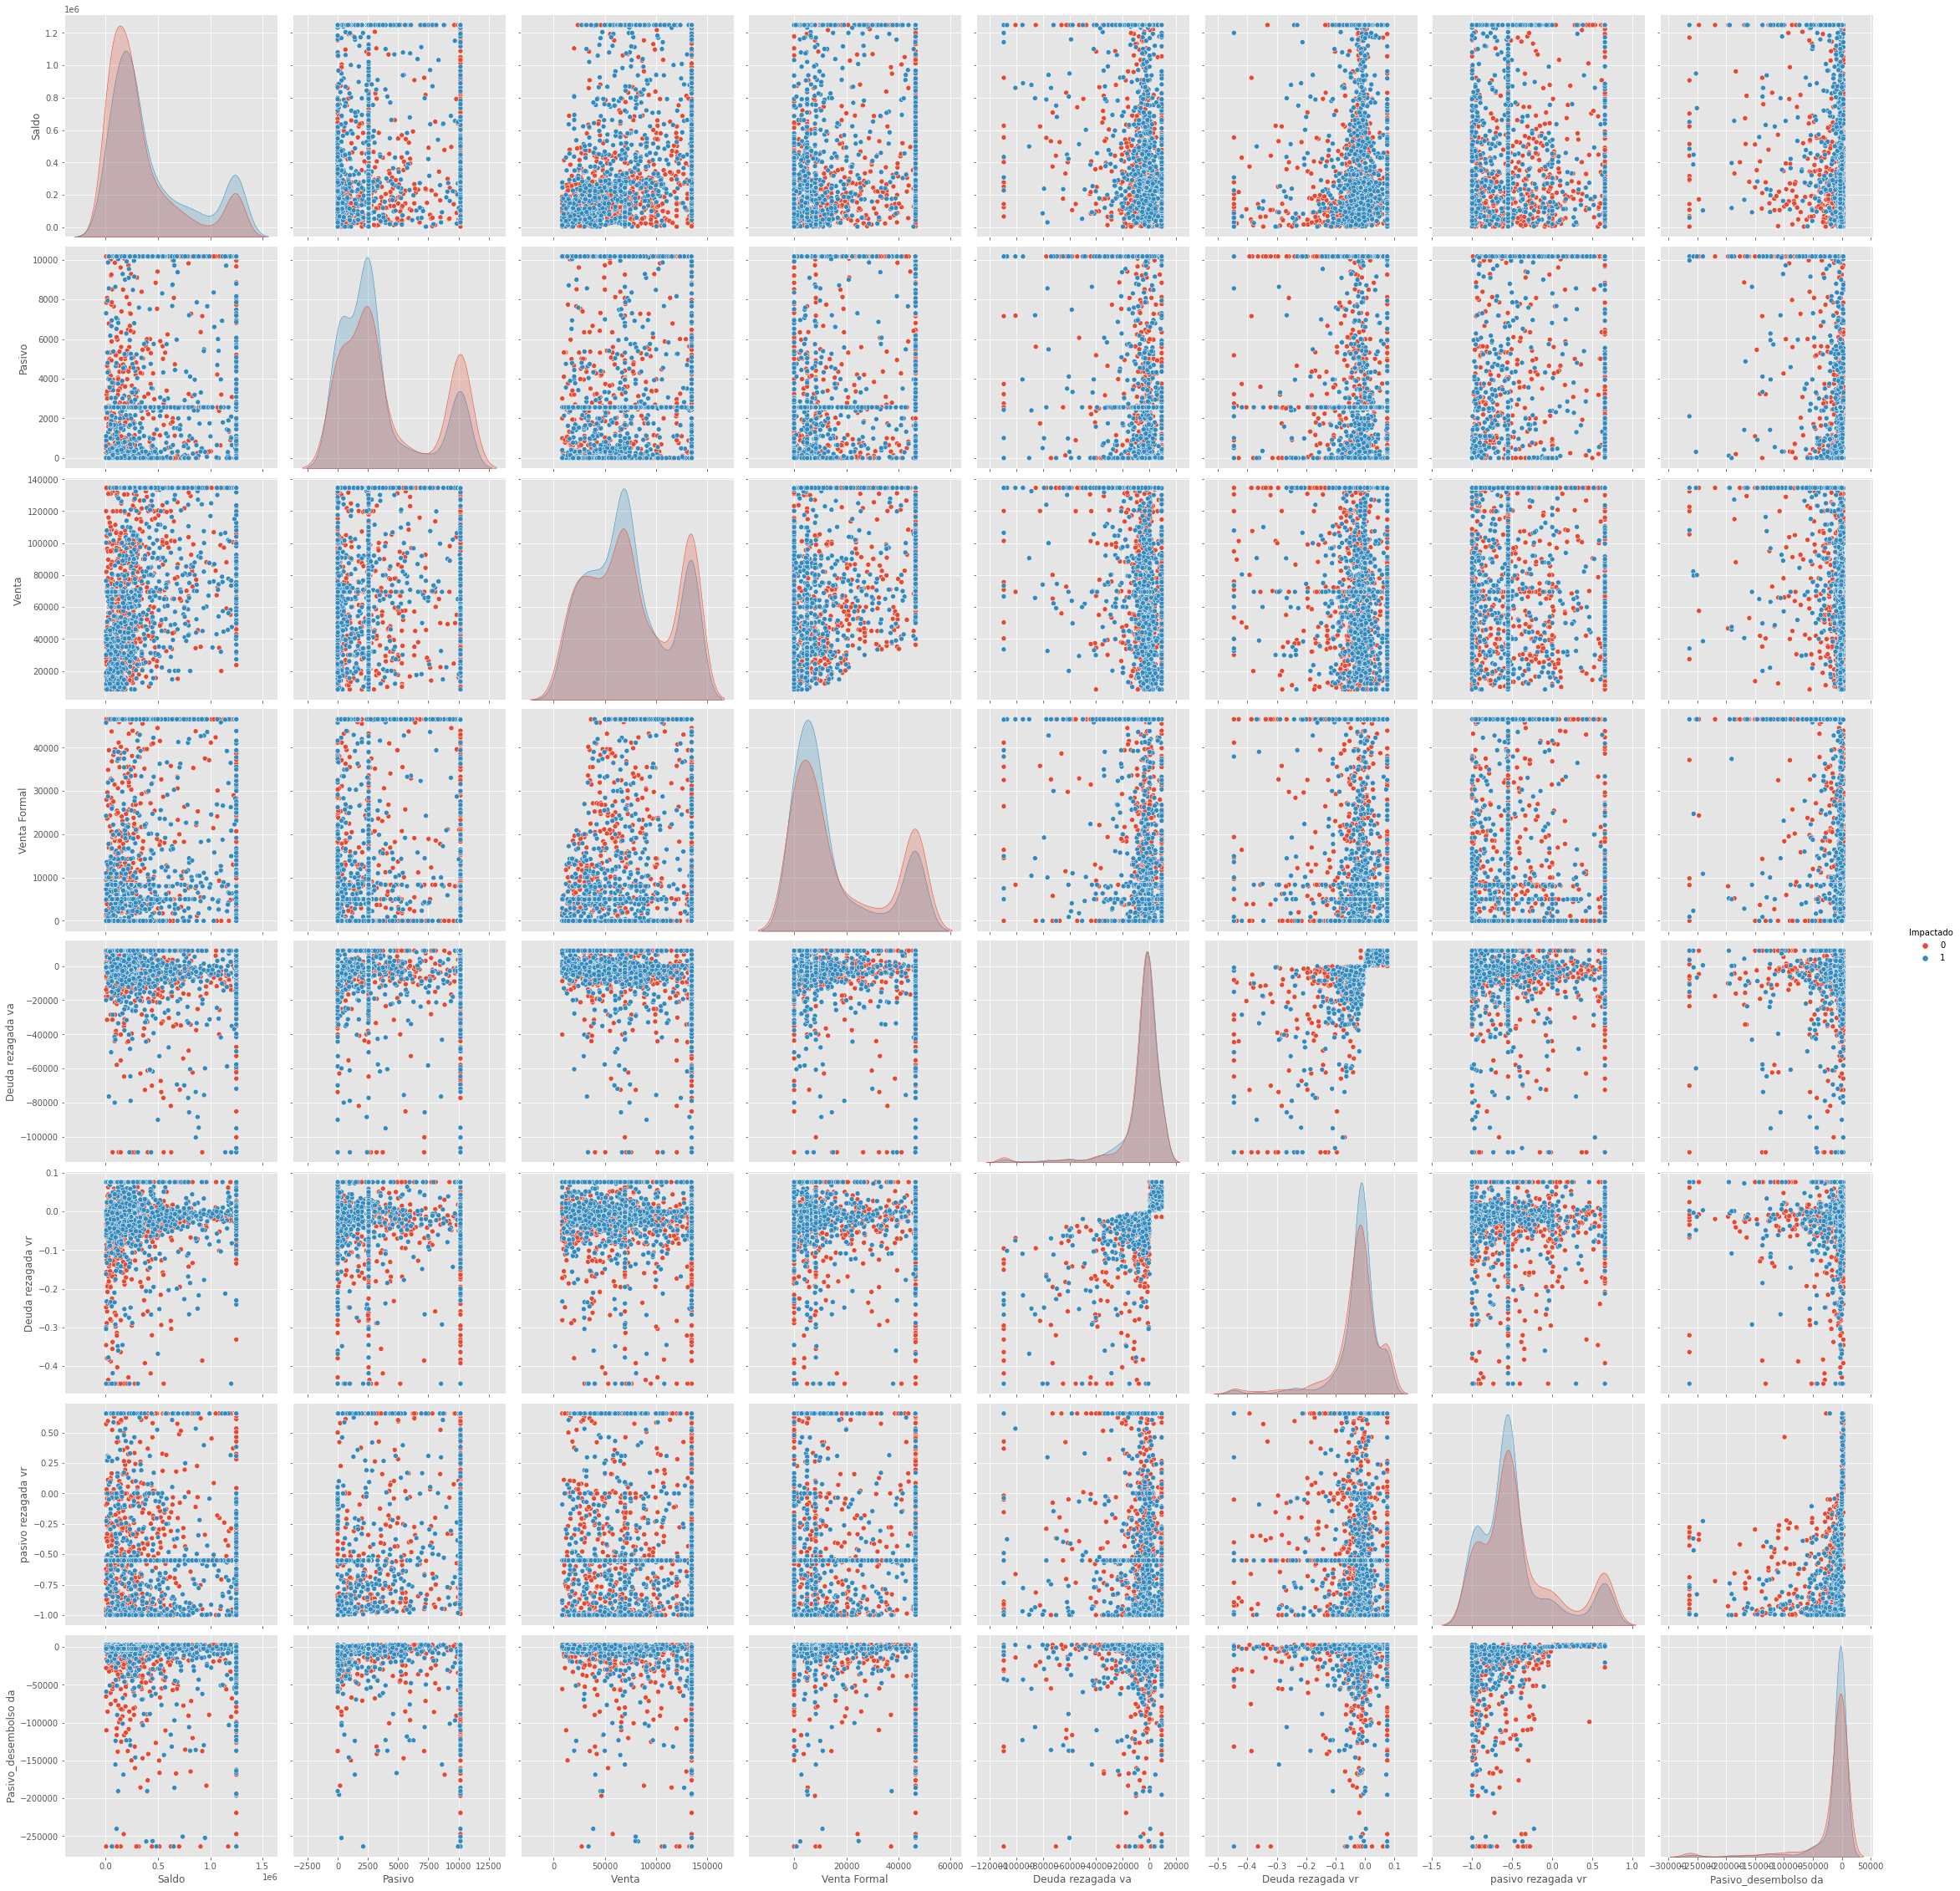

In [116]:
df=pd.concat([features2,data_covid['Impactado']],axis=1)
df.columns
#Visualizando por categoria impactado
sns.pairplot(df.dropna(), hue='Impactado',size=4,vars=['Saldo', 'Pasivo', 'Venta ', 'Venta Formal', 'Deuda rezagada va',
       'Deuda rezagada vr', 'pasivo rezagada vr','Pasivo_desembolso da'],kind='scatter')

In [265]:
# como se ve en el gráfico pareciera que no hay una marcada agrupación entre las variables inputs y la categoría impactado
#separando variables inputs:
df.columns
col1=['Saldo', 'Pasivo', 'Venta ', 'Venta Formal', 'Deuda rezagada va',
       'Deuda rezagada vr', 'pasivo rezagada vr','Pasivo_desembolso da']
X = np.array(df[col1])
y = np.array(df['Impactado'])
X.shape


(1998, 8)

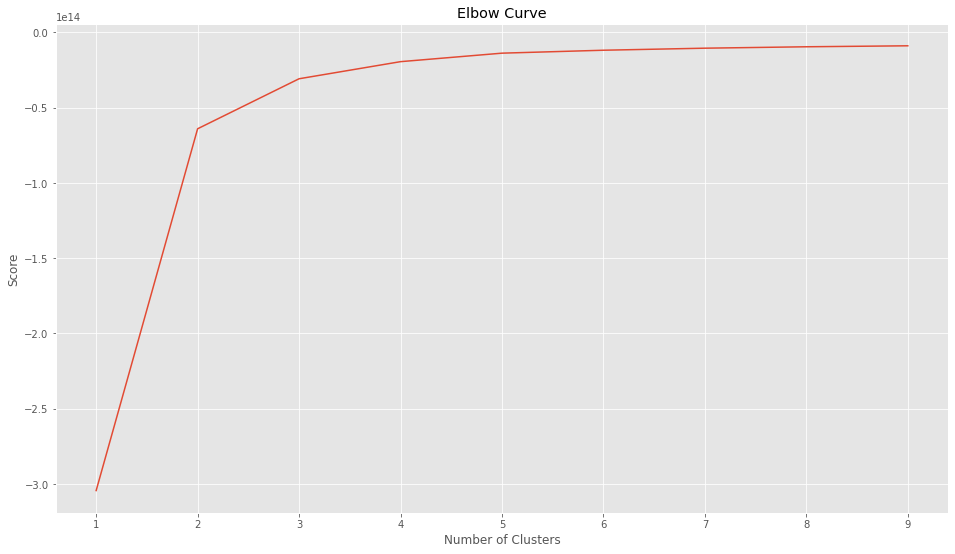

In [266]:
#Evaluando el valor de k*medias usando la curva de Ellbow
from sklearn.cluster import KMeans
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [273]:
#De acuedo al gráfico de ellbow se tomará k= 5
#Hallando los centroides:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)


[[ 2.46392802e+05  3.55419441e+03  7.10434497e+04  1.46108623e+04
  -3.77855785e+03 -1.82482816e-02 -4.39888938e-01 -1.14570895e+04]
 [ 1.22126671e+06  5.52375159e+03  1.07513087e+05  2.88764605e+04
  -1.34827152e+04 -1.63082036e-02 -4.41374277e-01 -3.02785432e+04]
 [ 4.92136765e+05  4.35248926e+03  9.12317163e+04  2.02149697e+04
  -9.99790429e+03 -3.20264916e-02 -4.46698030e-01 -2.13656366e+04]
 [ 7.44241271e+04  3.03018850e+03  5.34023274e+04  1.08090242e+04
  -3.16677591e+03 -4.46284758e-02 -4.25283493e-01 -9.33005686e+03]
 [ 7.97528478e+05  4.43439375e+03  9.81234395e+04  2.48401254e+04
  -1.26817296e+04 -2.49326508e-02 -4.08627783e-01 -2.84851607e+04]]


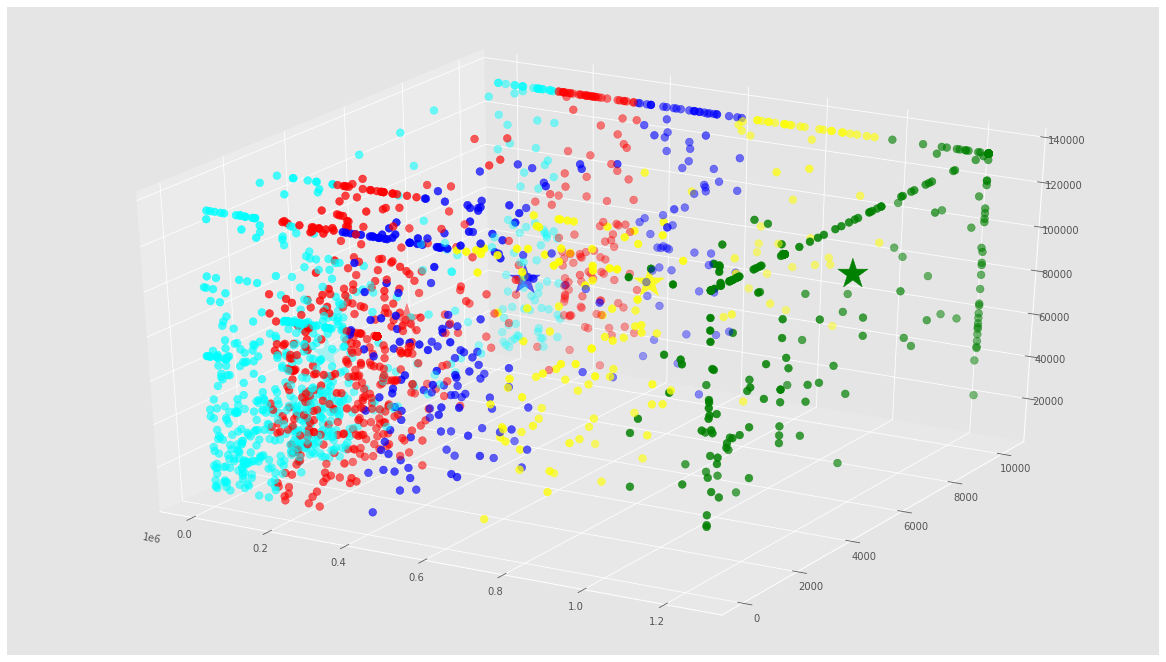

In [274]:
#Predeciendo los clusters con k=5
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
features2.columns
labels = kmeans.predict(X)
# Obteniendo los clusters
C = kmeans.cluster_centers_
#Asignando colores a los clusters
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
# Vista en 3D de los cluster para las variables 'Saldo', 'Pasivo', 'Venta ' 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],c=asignar, s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*',c=colores, s=1000)

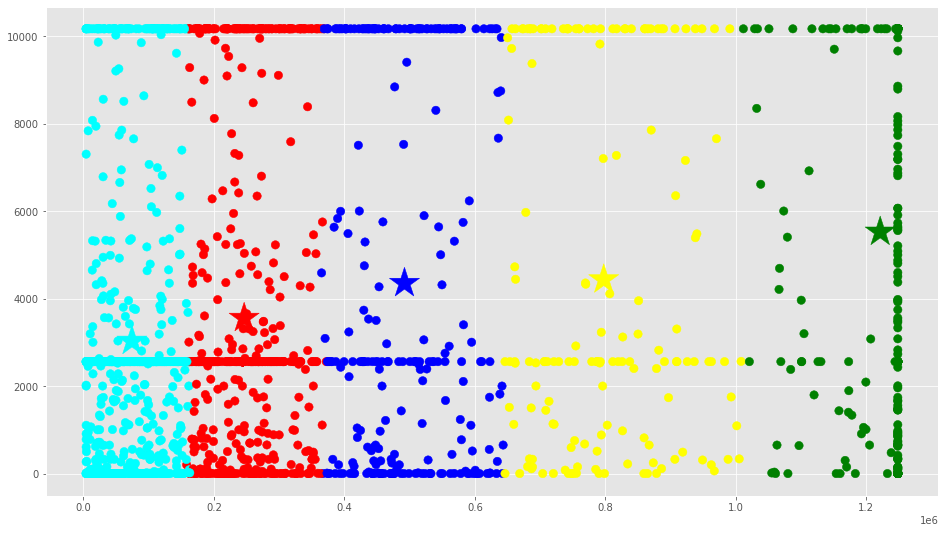

In [275]:
#Ploteando gráfica en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D 
#para que nos ayude a visualizar los grupos y su clasificación con k=5:
#Para variables saldo y Pasivos
f1 = df['Saldo'].values
f2 = df['Pasivo'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [276]:
#Hallando los centroides para k=4:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 2.90273229e+05  3.61437539e+03  7.55926260e+04  1.50780444e+04
  -5.03618849e+03 -2.06617606e-02 -4.44709285e-01 -1.26140838e+04]
 [ 1.20717610e+06  5.41504219e+03  1.07787228e+05  2.90367193e+04
  -1.36014687e+04 -1.68192135e-02 -4.50354382e-01 -3.08494335e+04]
 [ 8.93157145e+04  3.13821855e+03  5.44518650e+04  1.14353454e+04
  -3.22710912e+03 -4.12005610e-02 -4.14957791e-01 -9.91594795e+03]
 [ 6.72455098e+05  4.57343583e+03  9.60325091e+04  2.34438727e+04
  -1.09418837e+04 -2.72188790e-02 -4.42368439e-01 -2.52178491e+04]]


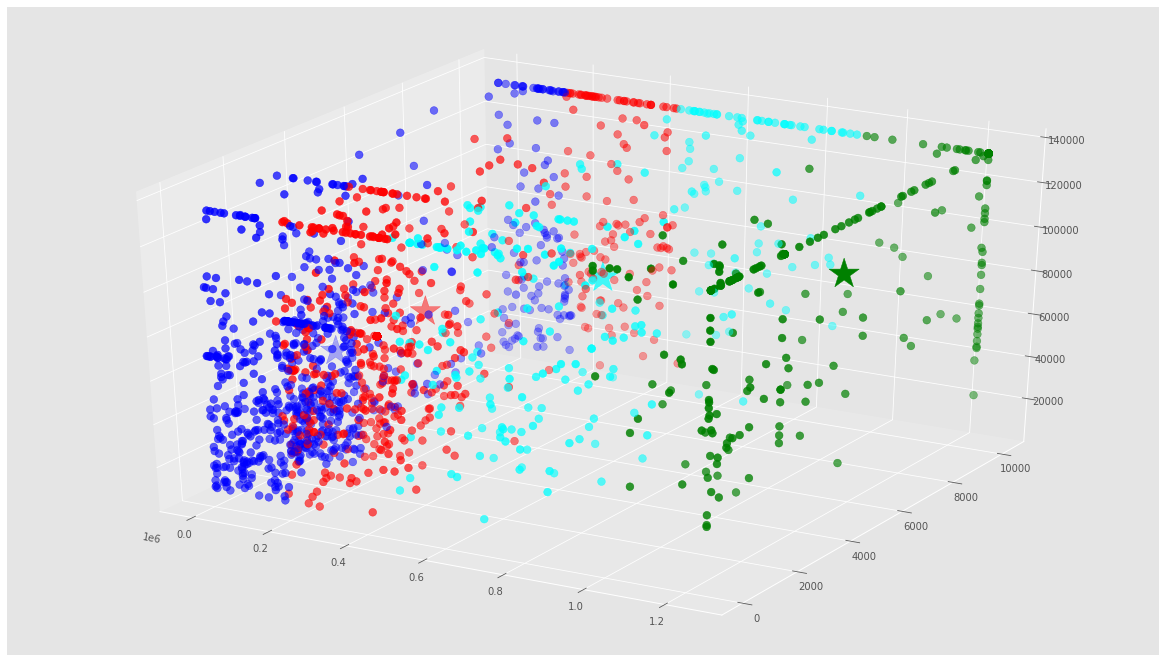

In [277]:
#Predeciendo los clusters con k=4
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
features2.columns
labels = kmeans.predict(X)
# Obteniendo los clusters
C = kmeans.cluster_centers_
#Asignando colores a los clusters
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])
# Vista en 3D de los cluster para las variables 'Saldo', 'Pasivo', 'Venta ' 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],c=asignar, s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*',c=colores, s=1000)

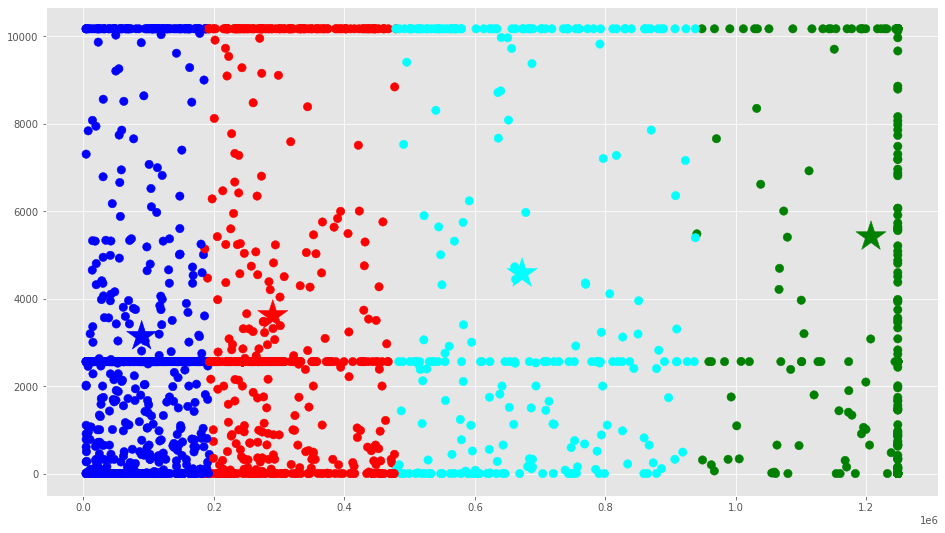

In [278]:
#Ploteando gráfica en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D 
#para que nos ayude a visualizar los grupos y su clasificación con k=4:
#Para variables saldo y Pasivos
f1 = df['Saldo'].values
f2 = df['Pasivo'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [279]:
#Hallando los centroides para k=3:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)


[[ 1.61290602e+05  3.29226401e+03  6.23500105e+04  1.27228686e+04
  -3.47475546e+03 -3.12927605e-02 -4.32639765e-01 -1.04317977e+04]
 [ 1.18929482e+06  5.38488541e+03  1.07501177e+05  2.87669687e+04
  -1.37735167e+04 -1.83736320e-02 -4.49639991e-01 -3.12494127e+04]
 [ 5.75811286e+05  4.39660125e+03  9.23904213e+04  2.14142883e+04
  -1.05056897e+04 -2.86456966e-02 -4.24879662e-01 -2.25295289e+04]]


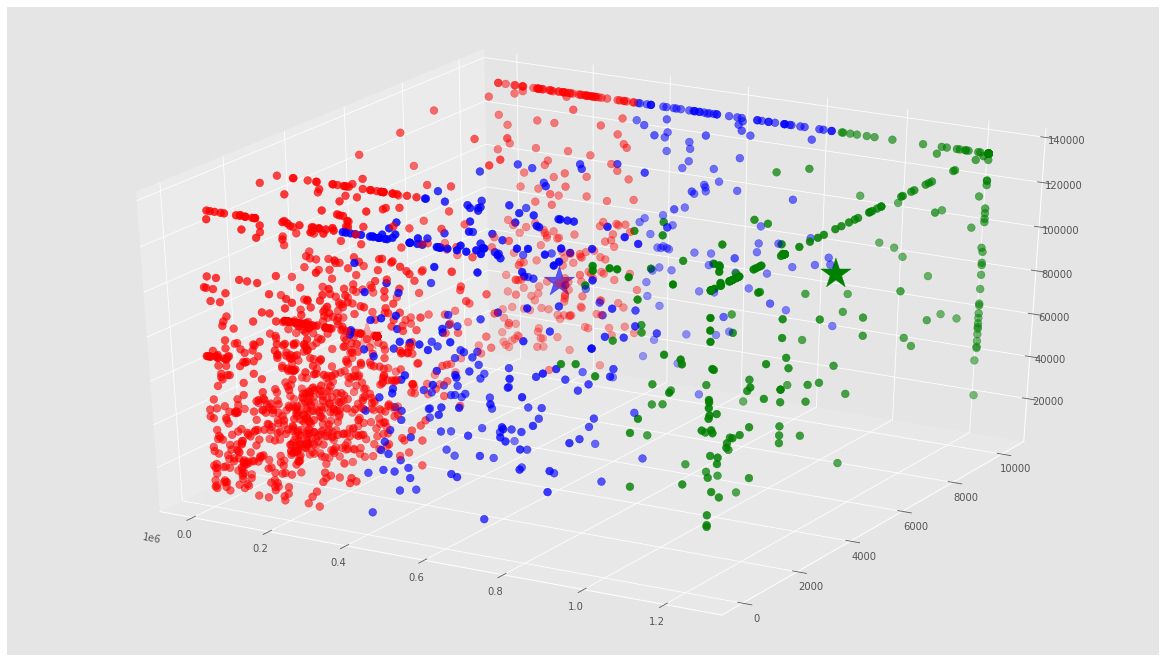

In [280]:
#Predeciendo los clusters con k=3
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
features2.columns
labels = kmeans.predict(X)
# Obteniendo los clusters
C = kmeans.cluster_centers_
#Asignando colores a los clusters
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])
# Vista en 3D de los cluster para las variables 'Saldo', 'Pasivo', 'Venta ' 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],c=asignar, s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*',c=colores, s=1000)

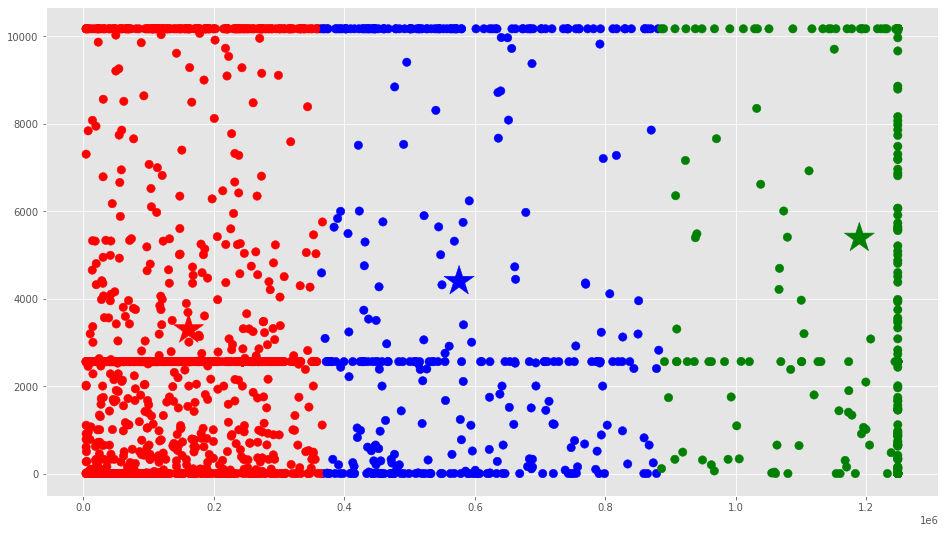

In [281]:
#Ploteando gráfica en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D 
#para que nos ayude a visualizar los grupos y su clasificación con k=3:
#Para variables saldo y Pasivos
f1 = df['Saldo'].values
f2 = df['Pasivo'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

# Conclusión 

De acuerdo a los evaluaciones con k= 3,4,5   se observa que con k= 3 los centroides están mejor ubicados en el espacio de los features lo cual muestra una mejor agrupación de la data, en consecuencia sería recomendable en la categoría de "impactado" añadir una categoría  más para la clasificación de la data , es decir que la categoría tenga 3 niveles de impacto .

**2.	Reducción de Dimensionamiento**

In [282]:
#Estandarizando la data feature
#normalizamos los datos
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
#df1 = features.drop(['Impactado'], axis=1) # quito la variable dependiente "Y"
df1=features
scaler.fit(df1) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(df1)

In [283]:
features.shape

(1998, 13)

In [284]:
#Instanciamos objeto PCA y aplicamos
from sklearn.decomposition import PCA

pca=PCA(n_components=4) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA
 
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:4]))

shape of X_pca (1998, 4)
[0.32291119 0.20432581 0.15054523 0.12190722]
suma: 0.7996894404762771


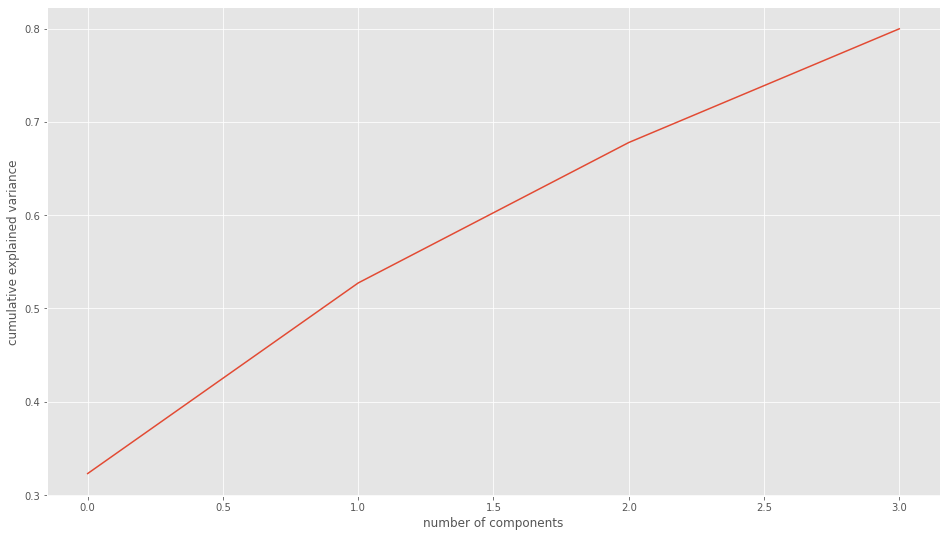

In [285]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [192]:
# del gráfico el mínimo número de componentes para superar el 70% de la varianza explicada
#es igual a  4

In [286]:
#Aplicando regresión logística con los nuevos componentes:
#Modelo con regresión logística
# Separando en train y test
from sklearn.model_selection import train_test_split

Y=df['Impactado']
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_pca,Y,test_size=0.2,
                                           random_state=1)

In [287]:
from sklearn import linear_model
logit_model = linear_model.LogisticRegression()
logit_model.fit(Xtrain,Ytrain)

#Accuracy del modelo en el training
print(logit_model.score(Xtrain,Ytrain))

0.5775969962453066


In [288]:
#Accuracy del modelo en el testing
print(logit_model.score(Xtest,Ytest))

0.6125


In [289]:
#Función Gini
def Gini(y_true,y_pred,signo='+'):
    from sklearn.metrics import roc_auc_score
    return 2*roc_auc_score(y_true, y_pred)-1

In [290]:
#Determinando las probabilidades obtener target impactado según el modelo
probs = logit_model.predict_proba(Xtrain)[:,1:]
m=pd.DataFrame(probs,columns = ['Probs'])
print(m)

         Probs
0     0.371557
1     0.367463
2     0.582241
3     0.490911
4     0.695892
...        ...
1593  0.717658
1594  0.542923
1595  0.695102
1596  0.357388
1597  0.445540

[1598 rows x 1 columns]


In [291]:
ytrain2=Ytrain.reset_index()
ytrain2['Probs']=m
print(ytrain2)

      index  Impactado     Probs
0         0          0  0.371557
1       813          0  0.367463
2      1153          1  0.582241
3       361          0  0.490911
4      1727          1  0.695892
...     ...        ...       ...
1593   1791          1  0.717658
1594   1096          1  0.542923
1595   1932          1  0.695102
1596    235          0  0.357388
1597   1061          1  0.445540

[1598 rows x 3 columns]


In [292]:
1*Gini(Ytrain,ytrain2["Probs"])
#Estandares: Gini>0.5 Bueno | 0.4<=Gini<=0.5 Aceptable | Gini<0.4 No es tan bueno

0.2417476899170894

In [200]:
#el Gini no es tan bueno en el training

In [294]:
#Determinando el gini en el testing
probs = logit_model.predict_proba(Xtest)[:,1:]
m=pd.DataFrame(probs,columns = ['Probs'])
print(m)

        Probs
0    0.628299
1    0.522926
2    0.607534
3    0.300736
4    0.508599
..        ...
395  0.448424
396  0.373519
397  0.405501
398  0.520750
399  0.499498

[400 rows x 1 columns]


In [295]:
ytest2=Ytest.reset_index()
ytest2['Probs']=m
print(ytest2)

     index  Impactado     Probs
0      608          0  0.628299
1     1697          1  0.522926
2      790          0  0.607534
3      650          0  0.300736
4     1636          1  0.508599
..     ...        ...       ...
395    400          0  0.448424
396    859          0  0.373519
397    385          0  0.405501
398   1279          1  0.520750
399   1818          1  0.499498

[400 rows x 3 columns]


In [296]:
1*Gini(Ytest,ytest2["Probs"])
#Estandares: Gini>0.5 Bueno | 0.4<=Gini<=0.5 Aceptable | Gini<0.4 No es tan bueno

0.24924992499249932

In [204]:
#El Gini no es tan bueno

In [297]:
#Modelo de arboles de decisión
from sklearn.tree import DecisionTreeClassifier
tree_f = DecisionTreeClassifier(criterion="entropy", min_samples_split=20,
                                random_state=99,min_samples_leaf=5)
#Ajustando el modelo a las data de entrenamiento
tree_f.fit(Xtrain,Ytrain)
#Prediciendo 
ytrain2 = tree_f.predict(Xtrain)
print(pd.crosstab(Ytrain, ytrain2, rownames=["Actual"], colnames=["Predictions"]))

Predictions    0    1
Actual               
0            584  213
1            162  639


In [298]:
#Accuracy del modelo en el training
print(tree_f.score(Xtrain,Ytrain))

0.7653316645807259


In [299]:
#Accuracy del modelo en el testing
print(tree_f.score(Xtest,Ytest))

0.525


In [300]:
#Determinando las probabilidades obtener target impactado según el modelo usando árboles de decisión
probs = tree_f.predict_proba(Xtrain)[:,1:]
m=pd.DataFrame(probs,columns = ['Probs'])
print(m)

         Probs
0     0.000000
1     0.000000
2     0.750000
3     0.357143
4     1.000000
...        ...
1593  0.600000
1594  0.625000
1595  1.000000
1596  0.000000
1597  0.384615

[1598 rows x 1 columns]


In [301]:
ytrain2=Ytrain.reset_index()
ytrain2['Probs']=m
print(ytrain2)

      index  Impactado     Probs
0         0          0  0.000000
1       813          0  0.000000
2      1153          1  0.750000
3       361          0  0.357143
4      1727          1  1.000000
...     ...        ...       ...
1593   1791          1  0.600000
1594   1096          1  0.625000
1595   1932          1  1.000000
1596    235          0  0.000000
1597   1061          1  0.384615

[1598 rows x 3 columns]


In [302]:
1*Gini(Ytrain,ytrain2["Probs"])
#Estandares: Gini>0.5 Bueno | 0.4<=Gini<=0.5 Aceptable | Gini<0.4 No es tan bueno

0.7156471599960526

In [211]:
#el Gini en el training es bueno

In [303]:
#determinando el gini en el testing
probs = tree_f.predict_proba(Xtest)[:,1:]
m=pd.DataFrame(probs,columns = ['Probs'])
print(m)

        Probs
0    0.428571
1    0.222222
2    0.000000
3    0.000000
4    0.857143
..        ...
395  0.071429
396  0.600000
397  0.384615
398  0.564885
399  0.222222

[400 rows x 1 columns]


In [304]:
ytest2=Ytest.reset_index()
ytest2['Probs']=m
print(ytest2)

     index  Impactado     Probs
0      608          0  0.428571
1     1697          1  0.222222
2      790          0  0.000000
3      650          0  0.000000
4     1636          1  0.857143
..     ...        ...       ...
395    400          0  0.071429
396    859          0  0.600000
397    385          0  0.384615
398   1279          1  0.564885
399   1818          1  0.222222

[400 rows x 3 columns]


In [305]:
1*Gini(Ytest,ytest2["Probs"])
#Estandares: Gini>0.5 Bueno | 0.4<=Gini<=0.5 Aceptable | Gini<0.4 No es tan bueno

0.04285428542854275

In [215]:
#El Gini en el testing no es tan bueno

In [307]:
# Random Forest Modelo de Clasificación

from sklearn.ensemble import RandomForestClassifier
#Configurando el modelo
rf_cl=RandomForestClassifier(max_depth=15,n_estimators=10,random_state=4) 
 # Entrenamiento del modelo
rf_cl.fit(Xtrain,Ytrain)  
 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

In [308]:
# Precisión en el entrenamiento
print(rf_cl.score(Xtrain,Ytrain))

0.9274092615769712


In [309]:
#Precisión en el testing
print(rf_cl.score(Xtest,Ytest) )

0.555


In [310]:
#Determinando las probabilidades obtener target impactado según el modelo Random Forest
probs = rf_cl.predict_proba(Xtrain)[:,1:]
m=pd.DataFrame(probs,columns = ['Probs'])
print(m)

         Probs
0     0.036667
1     0.100000
2     0.650469
3     0.208022
4     1.000000
...        ...
1593  0.939046
1594  0.939048
1595  0.691908
1596  0.364874
1597  0.864874

[1598 rows x 1 columns]


In [311]:
ytrain2=Ytrain.reset_index()
ytrain2['Probs']=m
print(ytrain2)

      index  Impactado     Probs
0         0          0  0.036667
1       813          0  0.100000
2      1153          1  0.650469
3       361          0  0.208022
4      1727          1  1.000000
...     ...        ...       ...
1593   1791          1  0.939046
1594   1096          1  0.939048
1595   1932          1  0.691908
1596    235          0  0.364874
1597   1061          1  0.864874

[1598 rows x 3 columns]


In [312]:
1*Gini(Ytrain,ytrain2["Probs"])
#Estandares: Gini>0.5 Bueno | 0.4<=Gini<=0.5 Aceptable | Gini<0.4 No es tan bueno

0.9677504750178965

In [313]:
#EL Gini en el training es Bueno

In [314]:
#determinando el gini en el testing
probs = rf_cl.predict_proba(Xtest)[:,1:]
m=pd.DataFrame(probs,columns = ['Probs'])
print(m)

        Probs
0    0.751103
1    0.664286
2    0.433792
3    0.000000
4    0.255301
..        ...
395  0.142284
396  0.386134
397  0.364874
398  0.545842
399  0.542602

[400 rows x 1 columns]


In [315]:
ytest2=Ytest.reset_index()
ytest2['Probs']=m
print(ytest2)

     index  Impactado     Probs
0      608          0  0.751103
1     1697          1  0.664286
2      790          0  0.433792
3      650          0  0.000000
4     1636          1  0.255301
..     ...        ...       ...
395    400          0  0.142284
396    859          0  0.386134
397    385          0  0.364874
398   1279          1  0.545842
399   1818          1  0.542602

[400 rows x 3 columns]


In [316]:
1*Gini(Ytest,ytest2["Probs"])
#Estandares: Gini>0.5 Bueno | 0.4<=Gini<=0.5 Aceptable | Gini<0.4 No es tan bueno

0.12573757375737582

In [317]:
#EL Gini no es tan bueno

In [318]:
#XGBoost Modelo de Clasificación
import xgboost as xgb

#Configurando el modelo
xgb_cl=xgb.XGBClassifier(objective='binary:logistic',max_depth=15, n_estimators=10,seed=4) 

# Entrenamiento del modelo
xgb_cl.fit(Xtrain,Ytrain) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=4,
              silent=None, subsample=1, verbosity=1)

In [319]:
# Precisión en el entrenamiento
print(xgb_cl.score(Xtrain,Ytrain))

0.8979974968710889


In [320]:
# Precisión en el testing
print(xgb_cl.score(Xtest,Ytest))

0.55


In [321]:
#Determinando las probabilidades obtener target impactado según el modelo XGboost
probs = xgb_cl.predict_proba(Xtrain)[:,1:]
m=pd.DataFrame(probs,columns = ['Probs'])
print(m)

         Probs
0     0.275558
1     0.228697
2     0.655874
3     0.423327
4     0.759832
...        ...
1593  0.785431
1594  0.690763
1595  0.690156
1596  0.232644
1597  0.674579

[1598 rows x 1 columns]


In [322]:
ytrain2=Ytrain.reset_index()
ytrain2['Probs']=m
print(ytrain2)

      index  Impactado     Probs
0         0          0  0.275558
1       813          0  0.228697
2      1153          1  0.655874
3       361          0  0.423327
4      1727          1  0.759832
...     ...        ...       ...
1593   1791          1  0.785431
1594   1096          1  0.690763
1595   1932          1  0.690156
1596    235          0  0.232644
1597   1061          1  0.674579

[1598 rows x 3 columns]


In [323]:
1*Gini(Ytrain,ytrain2["Probs"])
#Estandares: Gini>0.5 Bueno | 0.4<=Gini<=0.5 Aceptable | Gini<0.4 No es tan bueno

0.9342650419723149

In [324]:
#El Gini para el training  es bueno

In [325]:
#Determinando el gini en el testing
probs = xgb_cl.predict_proba(Xtest)[:,1:]
m=pd.DataFrame(probs,columns = ['Probs'])
print(m)

        Probs
0    0.547581
1    0.564724
2    0.495806
3    0.213625
4    0.505817
..        ...
395  0.298805
396  0.454907
397  0.445089
398  0.540006
399  0.534152

[400 rows x 1 columns]


In [326]:
ytest2=Ytest.reset_index()
ytest2['Probs']=m
print(ytest2)

     index  Impactado     Probs
0      608          0  0.547581
1     1697          1  0.564724
2      790          0  0.495806
3      650          0  0.213625
4     1636          1  0.505817
..     ...        ...       ...
395    400          0  0.298805
396    859          0  0.454907
397    385          0  0.445089
398   1279          1  0.540006
399   1818          1  0.534152

[400 rows x 3 columns]


In [327]:
1*Gini(Ytest,ytest2["Probs"])
#Estandares: Gini>0.5 Bueno | 0.4<=Gini<=0.5 Aceptable | Gini<0.4 No es tan bueno

0.11488648864886475

In [328]:
#El gini en el testing no es tan bueno

In [329]:
#Modelo clasificador SVM 

from sklearn import svm
#Configurando el modelo
svm_clf = svm.SVC(probability=True)
#Entrenamiento del modelo
svm_clf.fit(Xtrain, Ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [330]:
# Precisión en el entrenamiento
print(svm_clf.score(Xtrain,Ytrain))

0.600125156445557


In [331]:
# Precisión en el testing
print(svm_clf.score(Xtest,Ytest))

0.635


In [332]:
#Determinando las probabilidades obtener target impactado según el modelo SVM
probs = svm_clf.predict_proba(Xtrain)[:,1:]
m=pd.DataFrame(probs,columns = ['Probs'])
print(m)

         Probs
0     0.400693
1     0.392686
2     0.614552
3     0.562795
4     0.606936
...        ...
1593  0.616037
1594  0.574832
1595  0.607726
1596  0.386080
1597  0.448560

[1598 rows x 1 columns]


In [333]:
ytrain2=Ytrain.reset_index()
ytrain2['Probs']=m
print(ytrain2)

      index  Impactado     Probs
0         0          0  0.400693
1       813          0  0.392686
2      1153          1  0.614552
3       361          0  0.562795
4      1727          1  0.606936
...     ...        ...       ...
1593   1791          1  0.616037
1594   1096          1  0.574832
1595   1932          1  0.607726
1596    235          0  0.386080
1597   1061          1  0.448560

[1598 rows x 3 columns]


In [334]:
1*Gini(Ytrain,ytrain2["Probs"])
#Estandares: Gini>0.5 Bueno | 0.4<=Gini<=0.5 Aceptable | Gini<0.4 No es tan bueno

0.3066649749293935

In [335]:
#El Gini en el entrenamiento no es tan bueno

In [336]:
#Determinando el gini en el testing
probs = svm_clf.predict_proba(Xtest)[:,1:]
m=pd.DataFrame(probs,columns = ['Probs'])
print(m)

        Probs
0    0.584973
1    0.561609
2    0.554064
3    0.371261
4    0.557030
..        ...
395  0.439924
396  0.430371
397  0.400066
398  0.565988
399  0.527418

[400 rows x 1 columns]


In [337]:
ytest2=Ytest.reset_index()
ytest2['Probs']=m
print(ytest2)

     index  Impactado     Probs
0      608          0  0.584973
1     1697          1  0.561609
2      790          0  0.554064
3      650          0  0.371261
4     1636          1  0.557030
..     ...        ...       ...
395    400          0  0.439924
396    859          0  0.430371
397    385          0  0.400066
398   1279          1  0.565988
399   1818          1  0.527418

[400 rows x 3 columns]


In [338]:
1*Gini(Ytest,ytest2["Probs"])
#Estandares: Gini>0.5 Bueno | 0.4<=Gini<=0.5 Aceptable | Gini<0.4 No es tan bueno

0.25715071507150733

In [339]:
#El Gini en el testing no es tan bueno